In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.cluster
import numpy as np
import seaborn as sns

colors = np.array(['darkturquoise', 'coral', 'skyblue', 'gold', 'lightgreen', 'green', 'mediumaquamarine',  'pink', 'deepskyblue',  'lightsteelblue', 'blue', 'navy', 'rebeccapurple', 'mediumorchid', 'hotpink', 'red','crimson', 'dimgrey'])

In [2]:
data = pd.read_csv('testdata.csv')
datad = data.drop_duplicates(["f_addr"], keep="first")
datad.head()

g_case_no      y_lat      x_lng                             f_addr  \
0   11000001  43.091474 -87.984090    5700 W CAPITOL DR MILWAUKEE, WI   
1   11000002  43.068454 -87.918139        2736 N 6TH ST MILWAUKEE, WI   
2   11000009  43.122443 -88.014475  8223 W THURSTON AVE MILWAUKEE, WI   
3   11000014  43.056875 -87.941243         2020 N 23 ST MILWAUKEE, WI   
4   11000024  43.054717 -87.936219         1840 N 19 ST MILWAUKEE, WI   

                                         gf_addr          c_case_type  \
0    5700 W Capitol Dr, Milwaukee, WI 53216, USA   Municipal citation   
1        2736 N 6th St, Milwaukee, WI 53212, USA   Municipal citation   
2  8223 W Thurston Ave, Milwaukee, WI 53218, USA  Summons & Complaint   
3       2020 N 23rd St, Milwaukee, WI 53205, USA  Summons & Complaint   
4       1840 N 19th St, Milwaukee, WI 53205, USA  Summons & Complaint   

                                         c_violation  \
0                   Ordinance 110-35-1, Retail Theft   
1  Ordinance 105-138-2, Resisting / Obstructing P...   
2  Ordinance 200 through 295, Building Code Viola...   
3  Ordinance 200 through 295, Building Code Viola...   
4  Ordinance 200 through 295, Building Code Viola...   

             c_violation_date j_finding  
0  2011-01-03 14:40:00.000000    Guilty  
1  2011-01-03 16:00:00.000000    Guilty  
2  2010-05-07 00:00:00.000000    Guilty  
3  2010-06-08 00:00:00.000000    Guilty  
4  2010-03-30 00:00:00.000000    Guilty

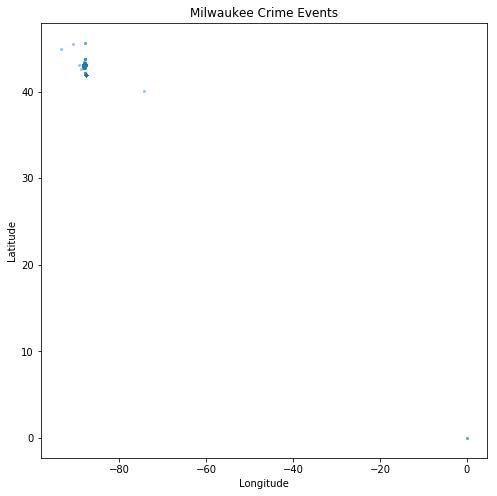

In [3]:
plt.figure(figsize=(8, 8))
plt.scatter(datad['x_lng'],datad['y_lat'], s=10, alpha=.4, linewidths=0)
plt.title('Milwaukee Crime Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

There are clearly some errors in the dataset. To clean it, I found the approximate latitude and longitude range for Milwaukee using Google Maps and removed all data points that didn't fall within in.

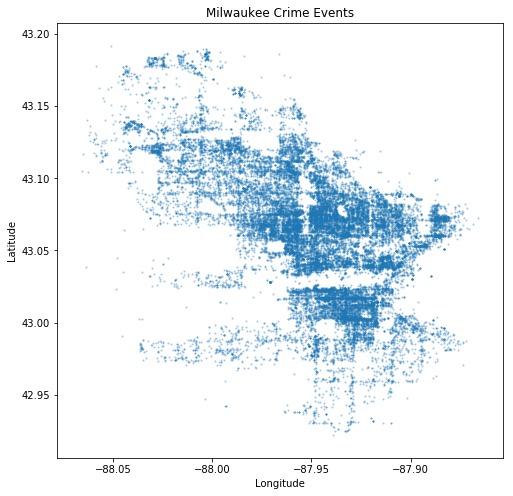

In [4]:
datadc = datad[(datad['x_lng'] > -88.0676) & (datad['x_lng'] < -87.8640)
               & (datad['y_lat'] > 42.9197) & (datad['y_lat'] < 43.1953)]
plt.clf()
plt.figure(figsize=(8, 8))
plt.scatter(datadc['x_lng'],datadc['y_lat'], s=4, alpha=.4, linewidths=0)
plt.title('Milwaukee Crime Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [31]:
def getVal(s):
    return 1 if s == 'Guilty' or s == 'Guilty - Suspended Sentence' else 0

datadc['guilty'] = datadc.apply(lambda row: getVal(row['j_finding']), axis=1) 

In [6]:
def getYear(s):
    return pd.to_numeric(s[0:4])
def getMonth(s):
    return pd.to_numeric(s[5:7])

datadc['year'] = datadc.apply(lambda row: getYear(row['c_violation_date']), axis=1) 
datadc['month'] = datadc.apply(lambda row: getMonth(row['c_violation_date']), axis=1) 

/Users/Laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Laura/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [8]:
datadc.to_csv('cleaneddata.csv')

In [9]:
datadc = pd.read_csv('cleaneddata.csv')

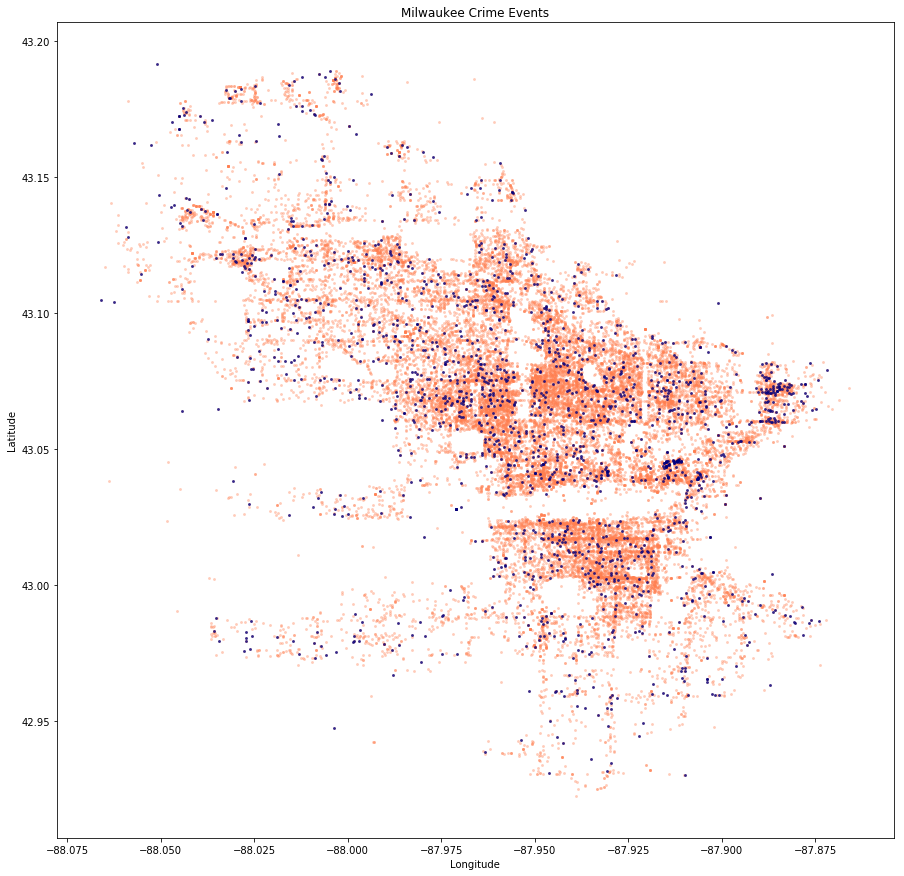

In [10]:
plt.clf()
plt.figure(figsize=(15,15))
plt.scatter(datadc['x_lng'],datadc['y_lat'], s=8, alpha=.4, linewidths=0, c='coral')
not_guilty = datadc[datadc['guilty'] == 0]
plt.scatter(not_guilty['x_lng'],not_guilty['y_lat'], s=8, alpha=.8, linewidths=0, c='navy')
plt.title('Milwaukee Crime Events')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

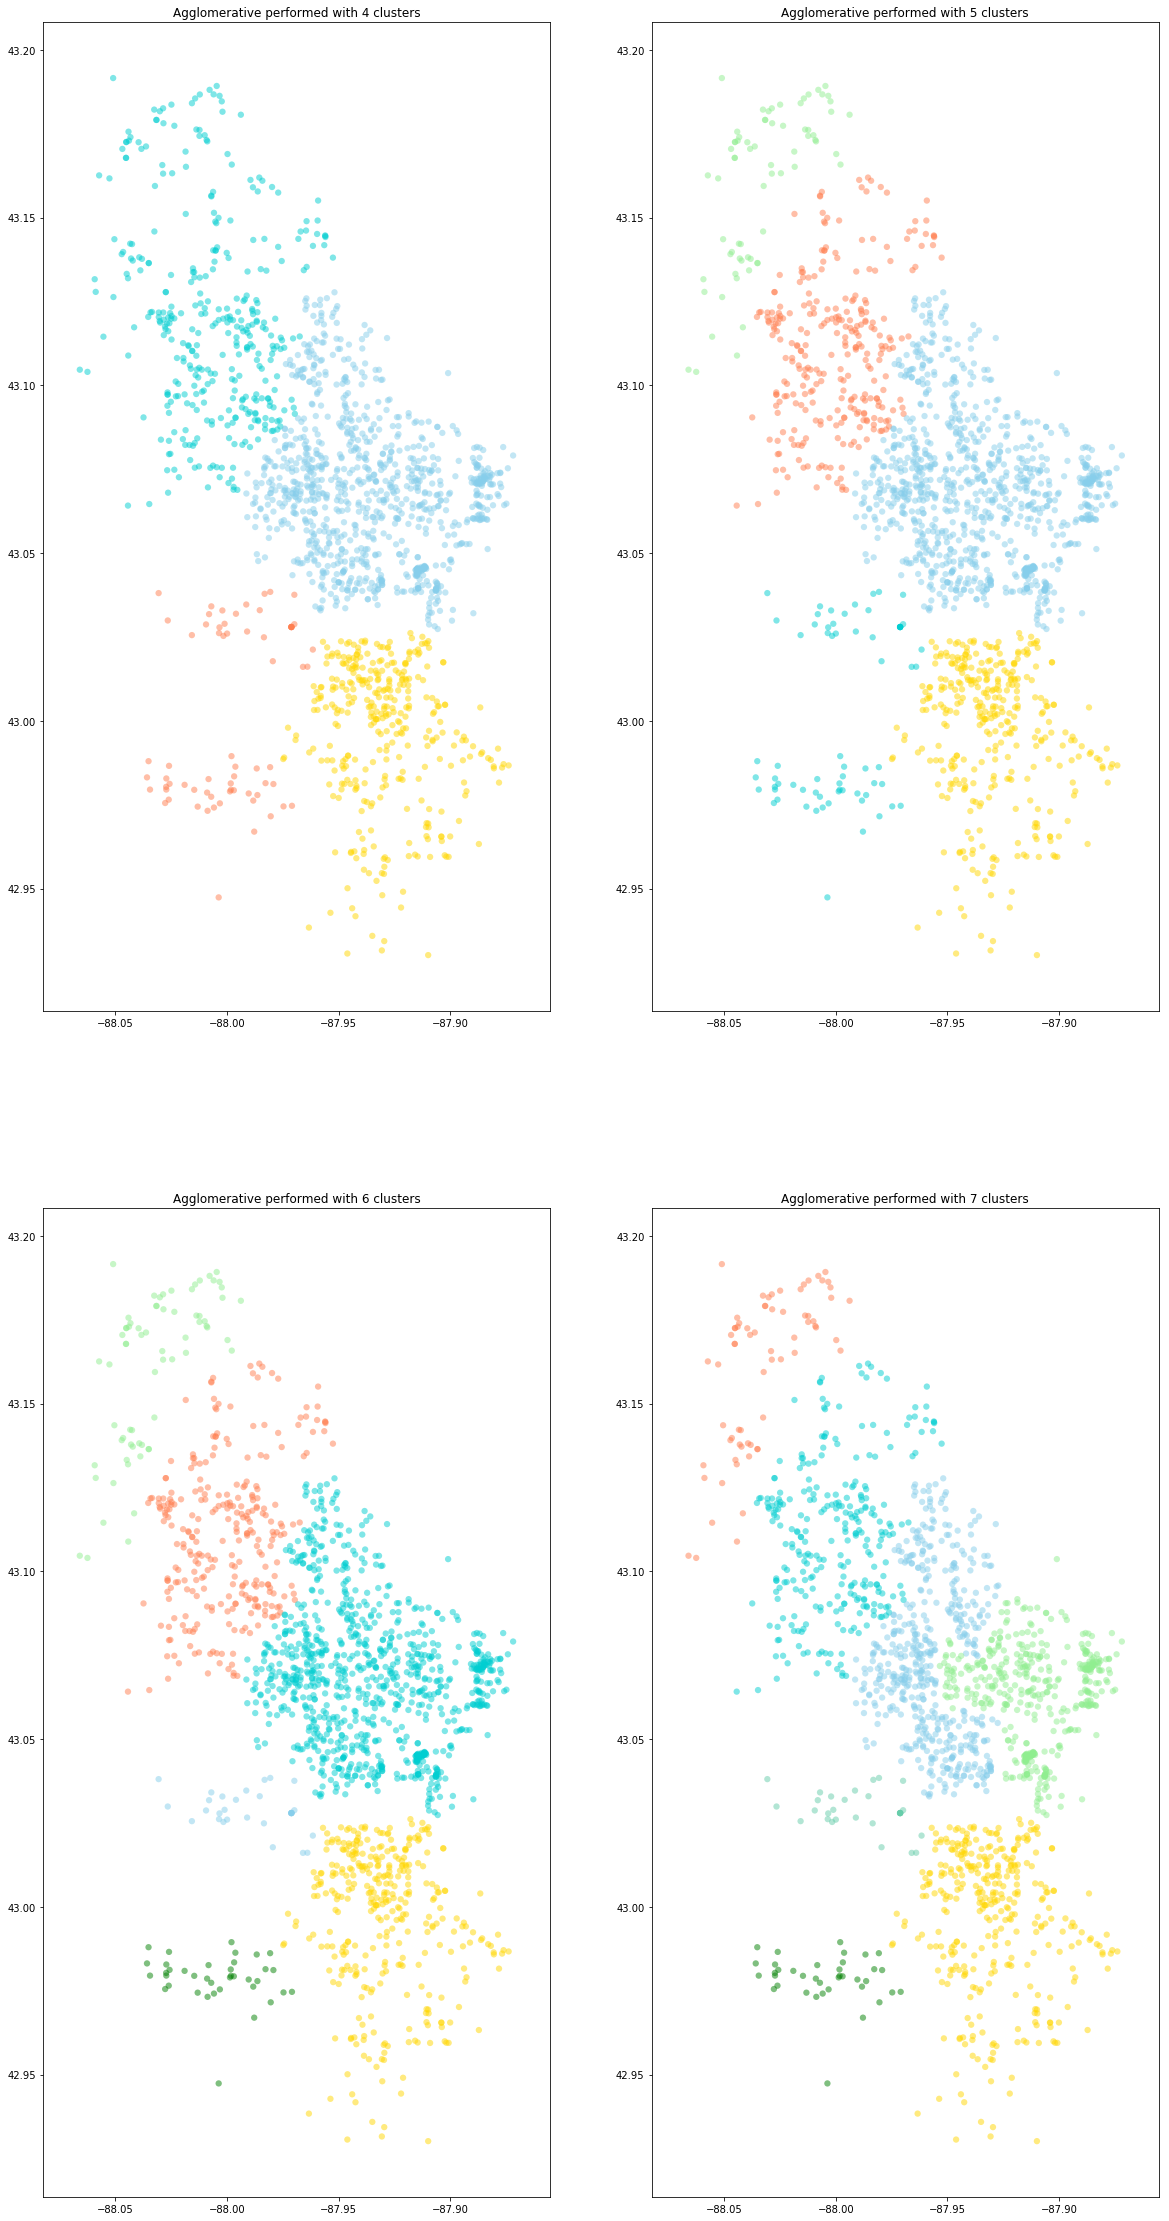

In [12]:
plt.clf()
plt.figure(figsize=(20,40))
for x in range(4, 8):
    agg = sklearn.cluster.AgglomerativeClustering(n_clusters = x, linkage = 'average', affinity='manhattan')
    agg.fit(not_guilty[['x_lng', 'y_lat']])
    cluster = agg.labels_
    plt.subplot(2, 2, (x-3))
    plt.title('Agglomerative performed with ' + str(x) + ' clusters')
    plt.scatter(not_guilty['x_lng'],not_guilty['y_lat'], c=colors[cluster], alpha=.5, linewidth=0, s=40)
plt.show()

## Clustering with a small sample

In [13]:
datadc_s = datadc[0:8000]

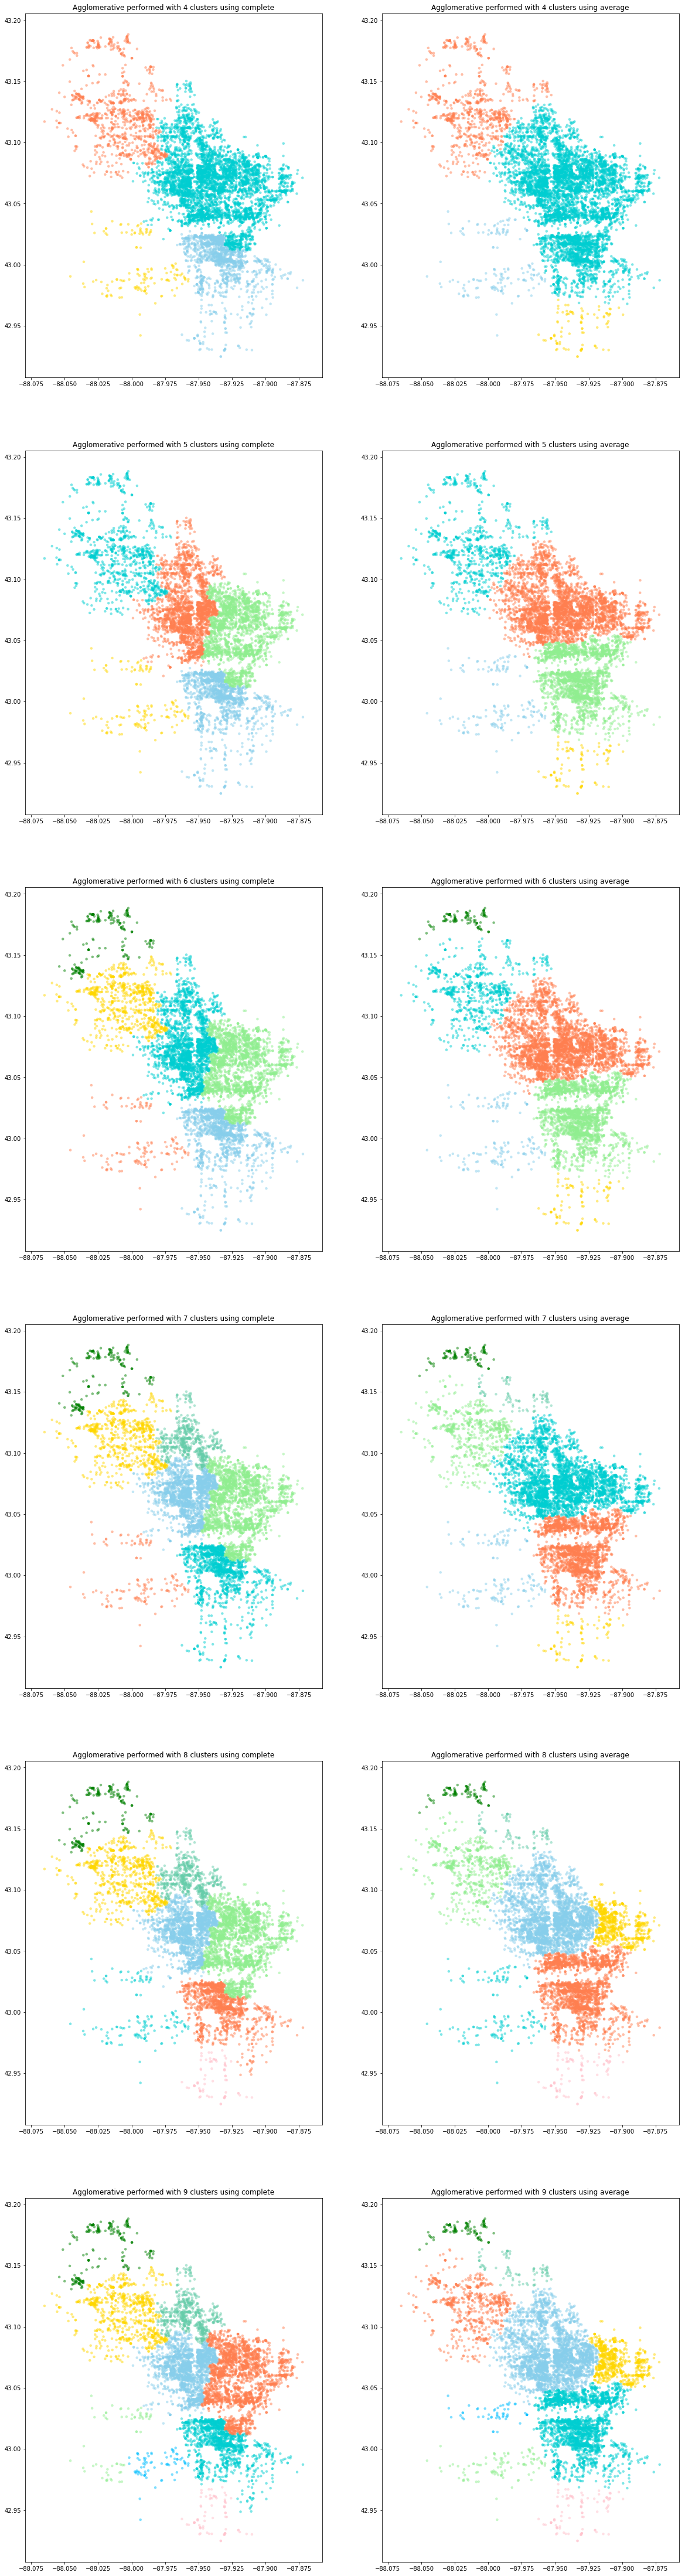

In [14]:
prox_schemes = ['complete', 'average']
plt.clf()
plt.figure(figsize=(20,80))
for x in range(4, 10):
    for z in range (0, 2):
        agg = sklearn.cluster.AgglomerativeClustering(n_clusters = x, linkage = prox_schemes[z], affinity='manhattan')
        agg.fit(datadc_s[['x_lng', 'y_lat']])
        cluster = agg.labels_
        plt.subplot(6, 2, ((x-4)*2)+(z+1))
        plt.title('Agglomerative performed with ' + str(x) + ' clusters using ' + prox_schemes[z])
        plt.scatter(datadc_s['x_lng'],datadc_s['y_lat'], c=colors[cluster], alpha=.5, linewidth=0, s=20)
plt.show()

In [35]:
v = datadc_s['guilty'].values.reshape(-1,1)
num_not_guilty = [0]*9
total = [0]*9

for x in range (0, len(cluster)):
    total[cluster[x]] = total[cluster[x]]+1
    num_not_guilty[cluster[x]] = num_not_guilty[cluster[x]]+1 if (v[x] == 0) else num_not_guilty[cluster[x]]
    
for x in range (0, 9):
    print('Cluster', x, '(', colors[x], ') has ', (num_not_guilty[x]/total[x]), '% not guilty verdicts.')


Cluster 0 ( darkturquoise ) has  0.004033736707004034 % not guilty verdicts.
Cluster 1 ( coral ) has  0.01347305389221557 % not guilty verdicts.
Cluster 2 ( skyblue ) has  0.009841932597673724 % not guilty verdicts.
Cluster 3 ( gold ) has  0.008706467661691543 % not guilty verdicts.
Cluster 4 ( lightgreen ) has  0.0 % not guilty verdicts.
Cluster 5 ( green ) has  0.008771929824561403 % not guilty verdicts.
Cluster 6 ( mediumaquamarine ) has  0.011764705882352941 % not guilty verdicts.
Cluster 7 ( pink ) has  0.010752688172043012 % not guilty verdicts.
Cluster 8 ( deepskyblue ) has  0.0 % not guilty verdicts.


Next, I did the same thing with all the available data:

5 CLUSTERS:


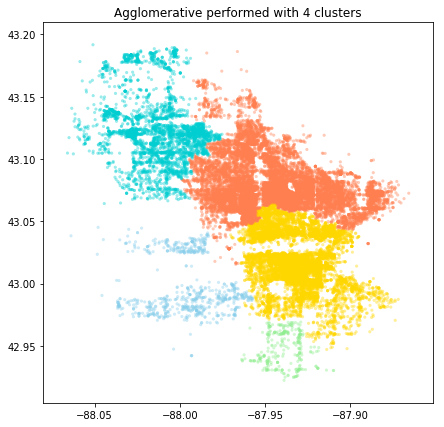

	Cluster 0 ( darkturquoise ) has  0.07445054945054945 % not guilty verdicts.
	Cluster 1 ( coral ) has  0.05517994946390767 % not guilty verdicts.
	Cluster 2 ( skyblue ) has  0.09090909090909091 % not guilty verdicts.
	Cluster 3 ( gold ) has  0.05218904030153668 % not guilty verdicts.
	Cluster 4 ( lightgreen ) has  0.10963455149501661 % not guilty verdicts.
6 CLUSTERS:


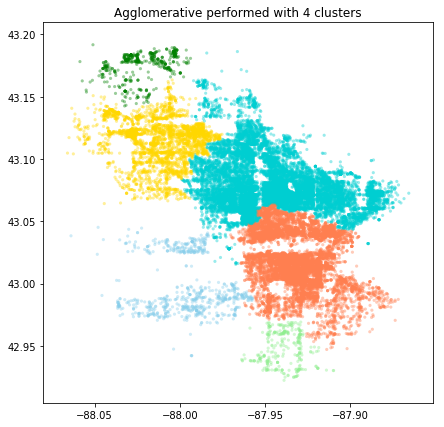

	Cluster 0 ( darkturquoise ) has  0.05517994946390767 % not guilty verdicts.
	Cluster 1 ( coral ) has  0.05218904030153668 % not guilty verdicts.
	Cluster 2 ( skyblue ) has  0.09090909090909091 % not guilty verdicts.
	Cluster 3 ( gold ) has  0.07131435881036137 % not guilty verdicts.
	Cluster 4 ( lightgreen ) has  0.10963455149501661 % not guilty verdicts.
	Cluster 5 ( green ) has  0.0935672514619883 % not guilty verdicts.
7 CLUSTERS:


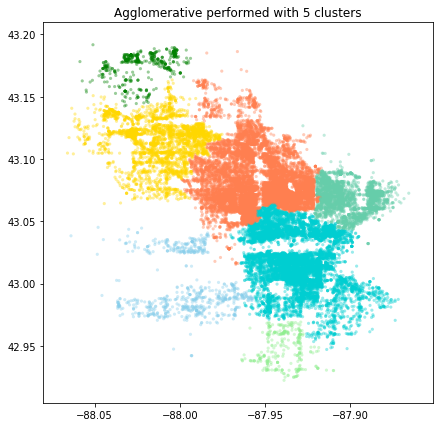

	Cluster 0 ( darkturquoise ) has  0.05218904030153668 % not guilty verdicts.
	Cluster 1 ( coral ) has  0.05134600498838909 % not guilty verdicts.
	Cluster 2 ( skyblue ) has  0.09090909090909091 % not guilty verdicts.
	Cluster 3 ( gold ) has  0.07131435881036137 % not guilty verdicts.
	Cluster 4 ( lightgreen ) has  0.10963455149501661 % not guilty verdicts.
	Cluster 5 ( green ) has  0.0935672514619883 % not guilty verdicts.
	Cluster 6 ( mediumaquamarine ) has  0.06996021220159152 % not guilty verdicts.
8 CLUSTERS:


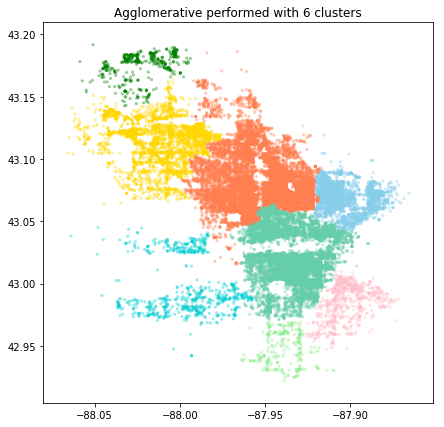

	Cluster 0 ( darkturquoise ) has  0.09090909090909091 % not guilty verdicts.
	Cluster 1 ( coral ) has  0.05134600498838909 % not guilty verdicts.
	Cluster 2 ( skyblue ) has  0.06996021220159152 % not guilty verdicts.
	Cluster 3 ( gold ) has  0.07131435881036137 % not guilty verdicts.
	Cluster 4 ( lightgreen ) has  0.10963455149501661 % not guilty verdicts.
	Cluster 5 ( green ) has  0.0935672514619883 % not guilty verdicts.
	Cluster 6 ( mediumaquamarine ) has  0.04967965549837202 % not guilty verdicts.
	Cluster 7 ( pink ) has  0.0811138014527845 % not guilty verdicts.
9 CLUSTERS:


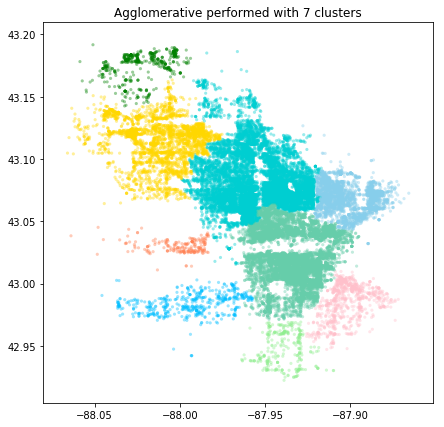

	Cluster 0 ( darkturquoise ) has  0.05134600498838909 % not guilty verdicts.
	Cluster 1 ( coral ) has  0.08866995073891626 % not guilty verdicts.
	Cluster 2 ( skyblue ) has  0.06996021220159152 % not guilty verdicts.
	Cluster 3 ( gold ) has  0.07131435881036137 % not guilty verdicts.
	Cluster 4 ( lightgreen ) has  0.10963455149501661 % not guilty verdicts.
	Cluster 5 ( green ) has  0.0935672514619883 % not guilty verdicts.
	Cluster 6 ( mediumaquamarine ) has  0.04967965549837202 % not guilty verdicts.
	Cluster 7 ( pink ) has  0.0811138014527845 % not guilty verdicts.
	Cluster 8 ( deepskyblue ) has  0.09181636726546906 % not guilty verdicts.


In [39]:
for c in range (5, 10):
    print(c,'CLUSTERS:')
    agg = sklearn.cluster.AgglomerativeClustering(n_clusters = c, linkage = 'average', affinity='manhattan')
    agg.fit(datadc[['x_lng', 'y_lat']])
    cluster = agg.labels_
    plt.clf()
    plt.figure(figsize=(7,7))
    plt.title('Agglomerative performed with ' + str(x) + ' clusters')
    plt.scatter(datadc['x_lng'],datadc['y_lat'], c=colors[cluster], alpha=.4, linewidth=0, s=10)
    plt.show()

    v = datadc['guilty'].values.reshape(-1,1)
    num_not_guilty = [0]*c
    total = [0]*c

    for x in range (0, len(cluster)):
        total[cluster[x]] = total[cluster[x]]+1
        num_not_guilty[cluster[x]] = num_not_guilty[cluster[x]]+1 if (v[x] == 0) else num_not_guilty[cluster[x]]

    for x in range (0, c):
        print('\tCluster', x, '(', colors[x], ') has ', (num_not_guilty[x]/total[x]), '% not guilty verdicts.')


## Examining data by month and year

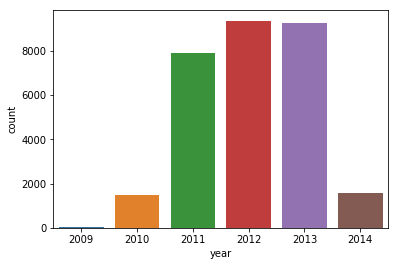

In [78]:
sns.countplot(data=datadc, x='year')
plt.show()

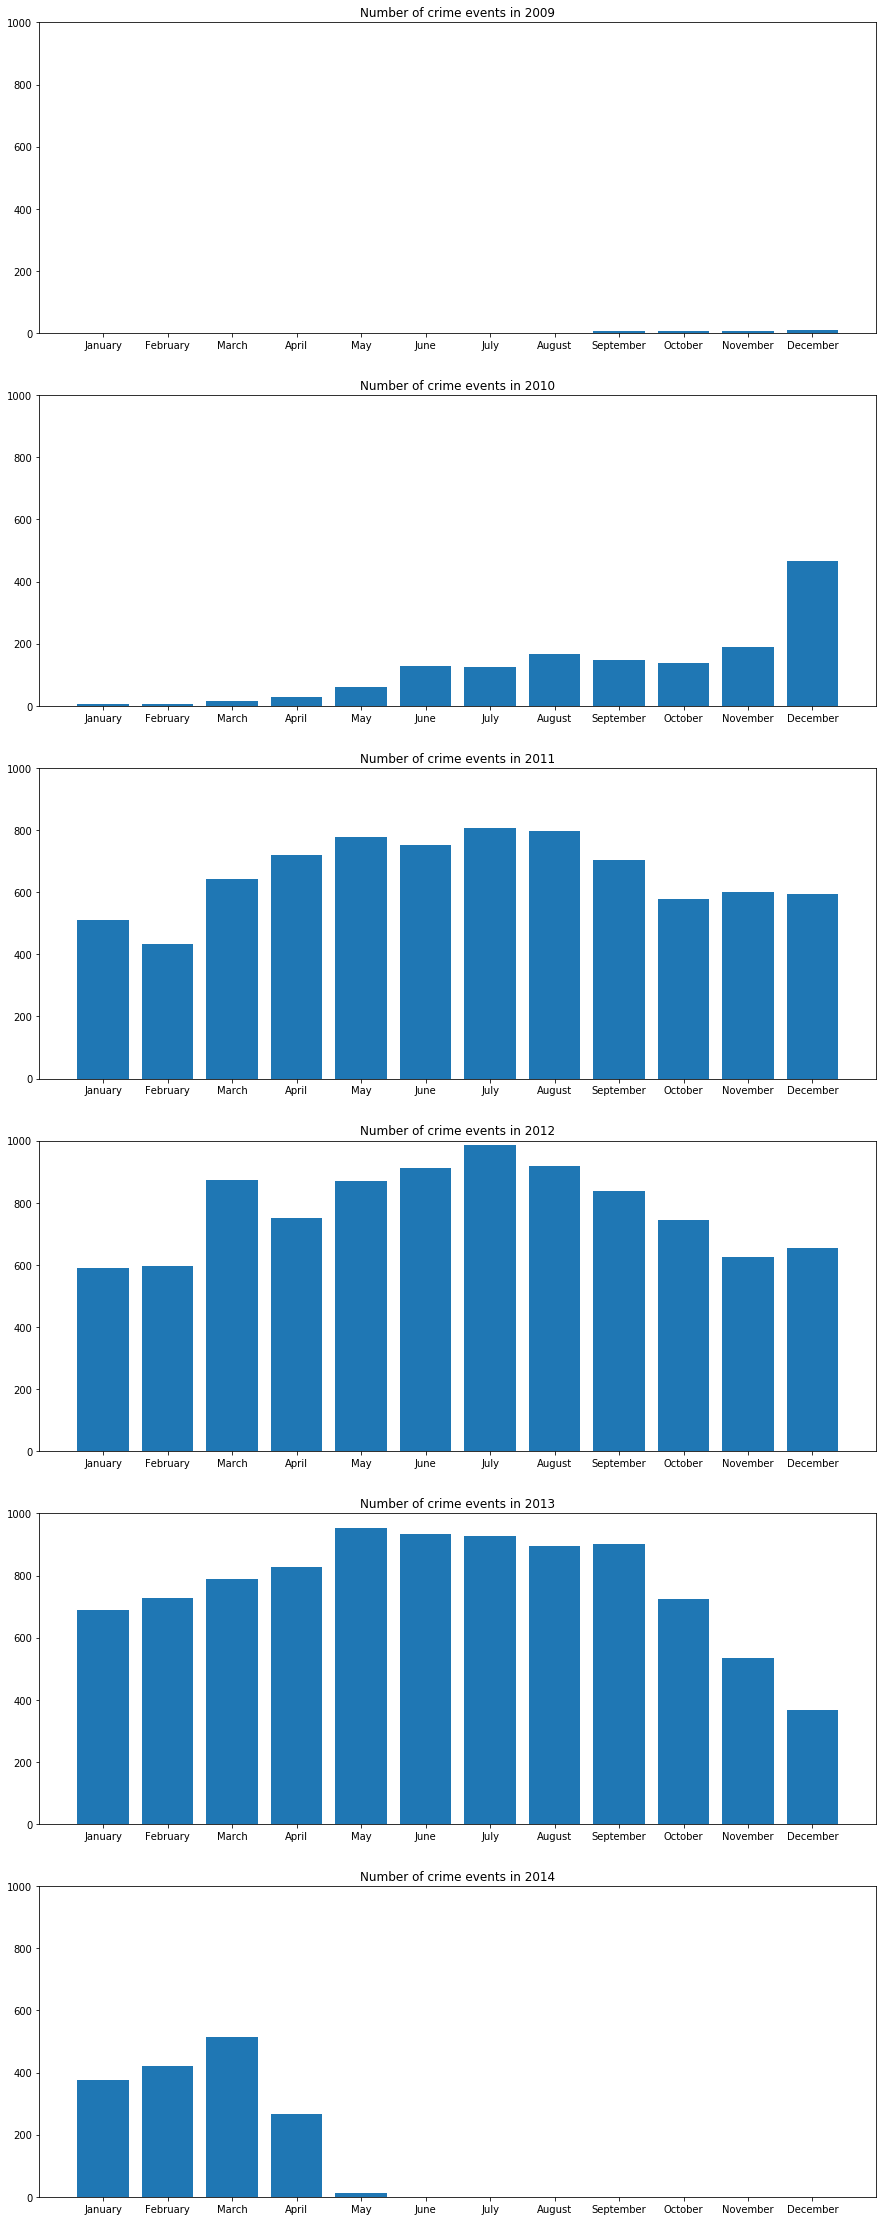

In [83]:
plt.clf()
plt.figure(figsize=(15,40))
names = []
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
for y in range (2009, 2015):
    count = []
    for m in range (1, 13):
        count = count + [len(datadc[(datadc['year'] == y) & (datadc['month'] == m)])]
        names = names + [months[m-1] + " " + str(y)]
    plt.subplot(6, 1, y-2008)
    plt.bar(np.linspace(1, 12, num=12), count)
    plt.ylim(0,1000)
    plt.xticks(np.linspace(1, 12, num=12), months)
    plt.title('Number of crime events in ' + str(y))
plt.show()
        

## Cluster by Month & Year

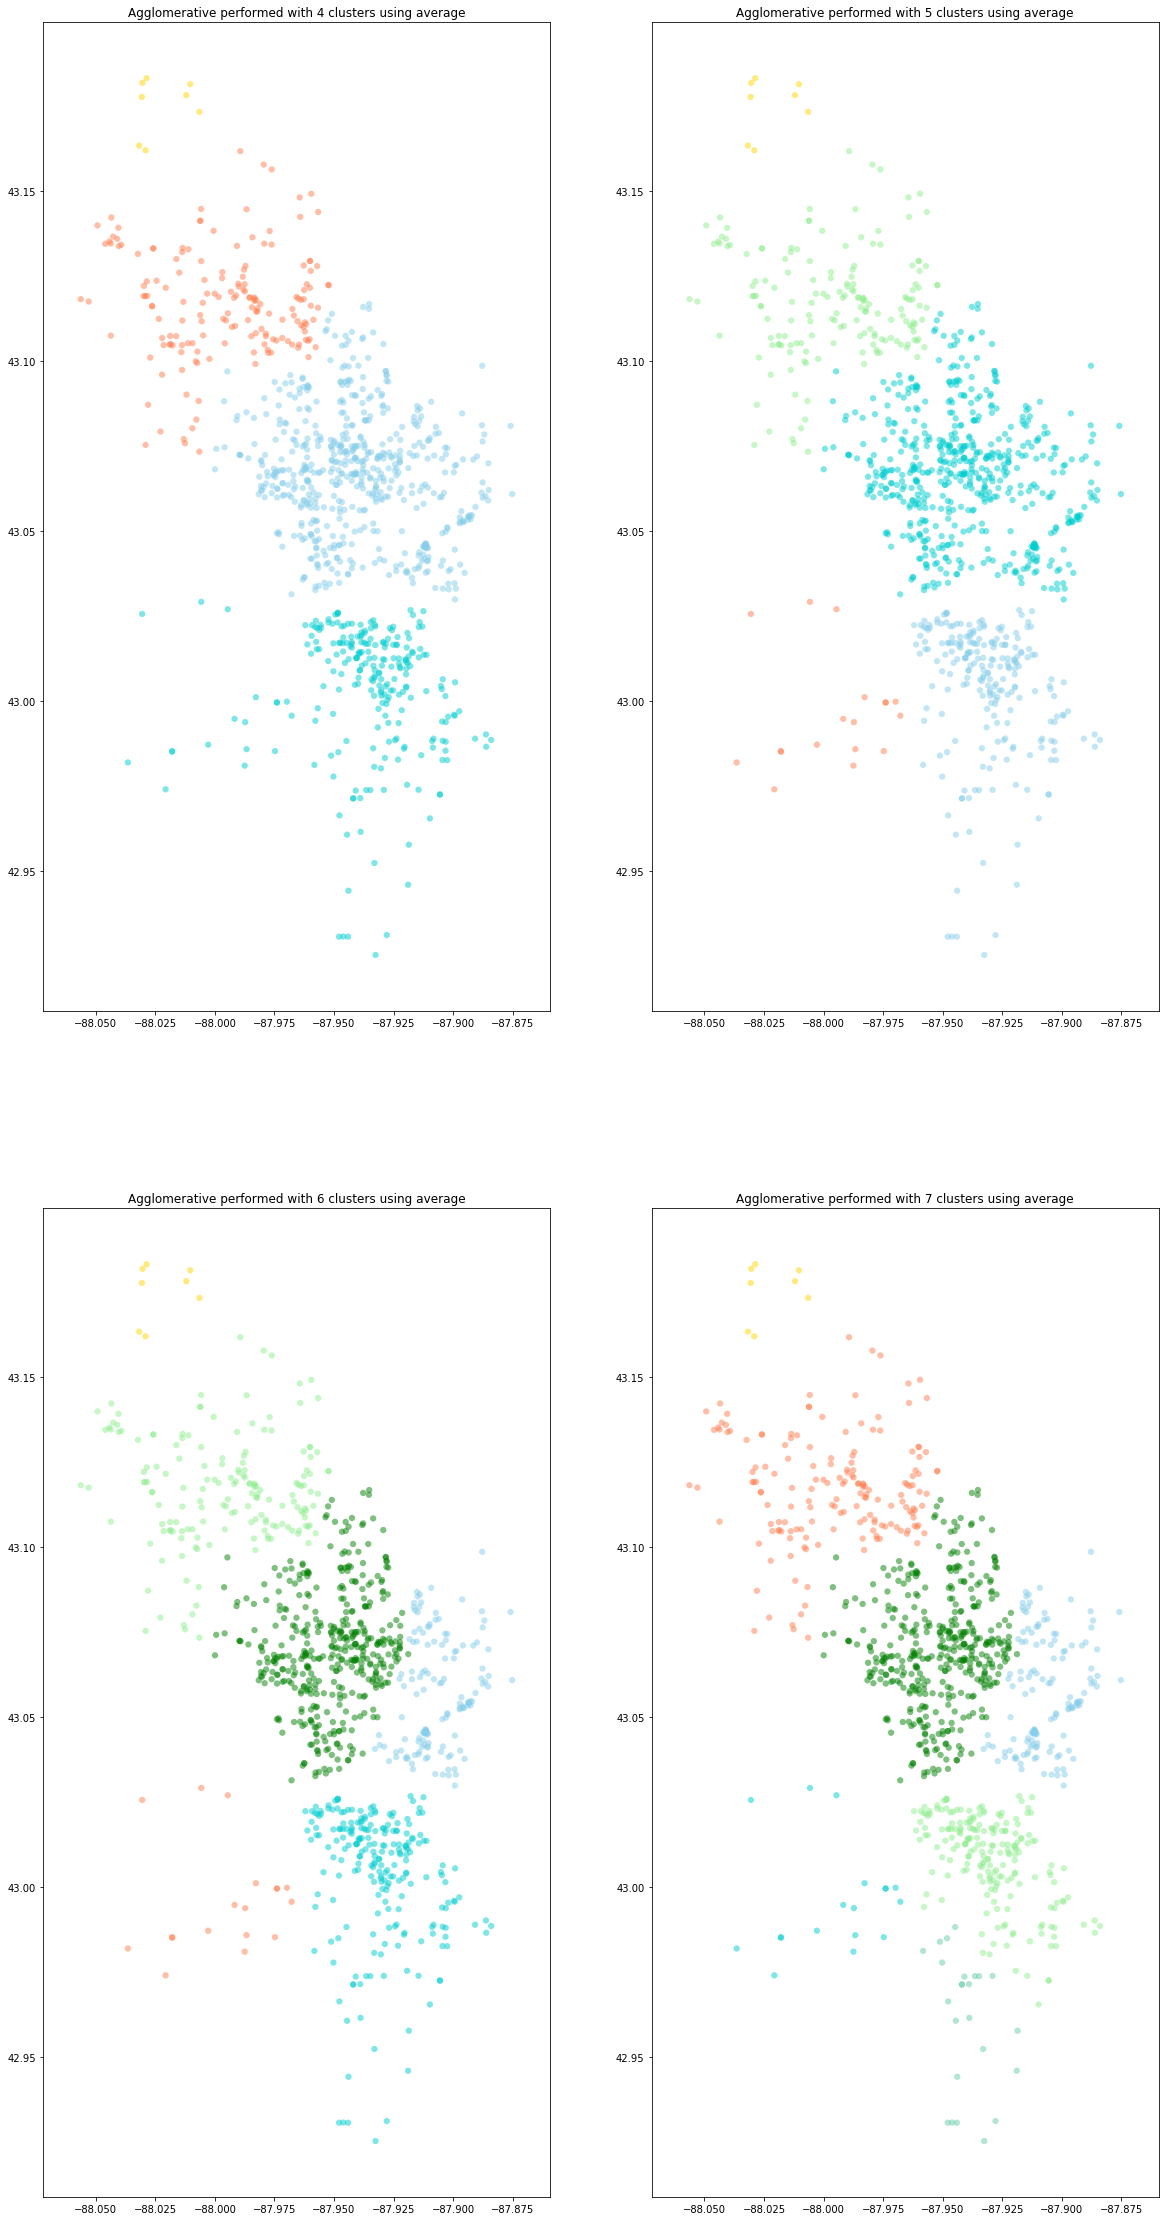

In [85]:
y = 2012
m = 7
plt.clf()
plt.figure(figsize=(20,40))
datadc_by_month = datadc[(datadc['year'] == y) & (datadc['month'] == m)]
for x in range(4, 8):
    agg = sklearn.cluster.AgglomerativeClustering(n_clusters = x, linkage = 'average', affinity='manhattan')
    agg.fit(datadc_by_month[['x_lng', 'y_lat']])
    cluster = agg.labels_
    plt.subplot(2, 2, (x-3))
    plt.title('Agglomerative performed with ' + str(x) + ' clusters using ' + prox_schemes[z])
    plt.scatter(datadc_by_month['x_lng'],datadc_by_month['y_lat'], c=colors[cluster], alpha=.5, linewidth=0, s=40)
plt.show()

## Cluster by Year

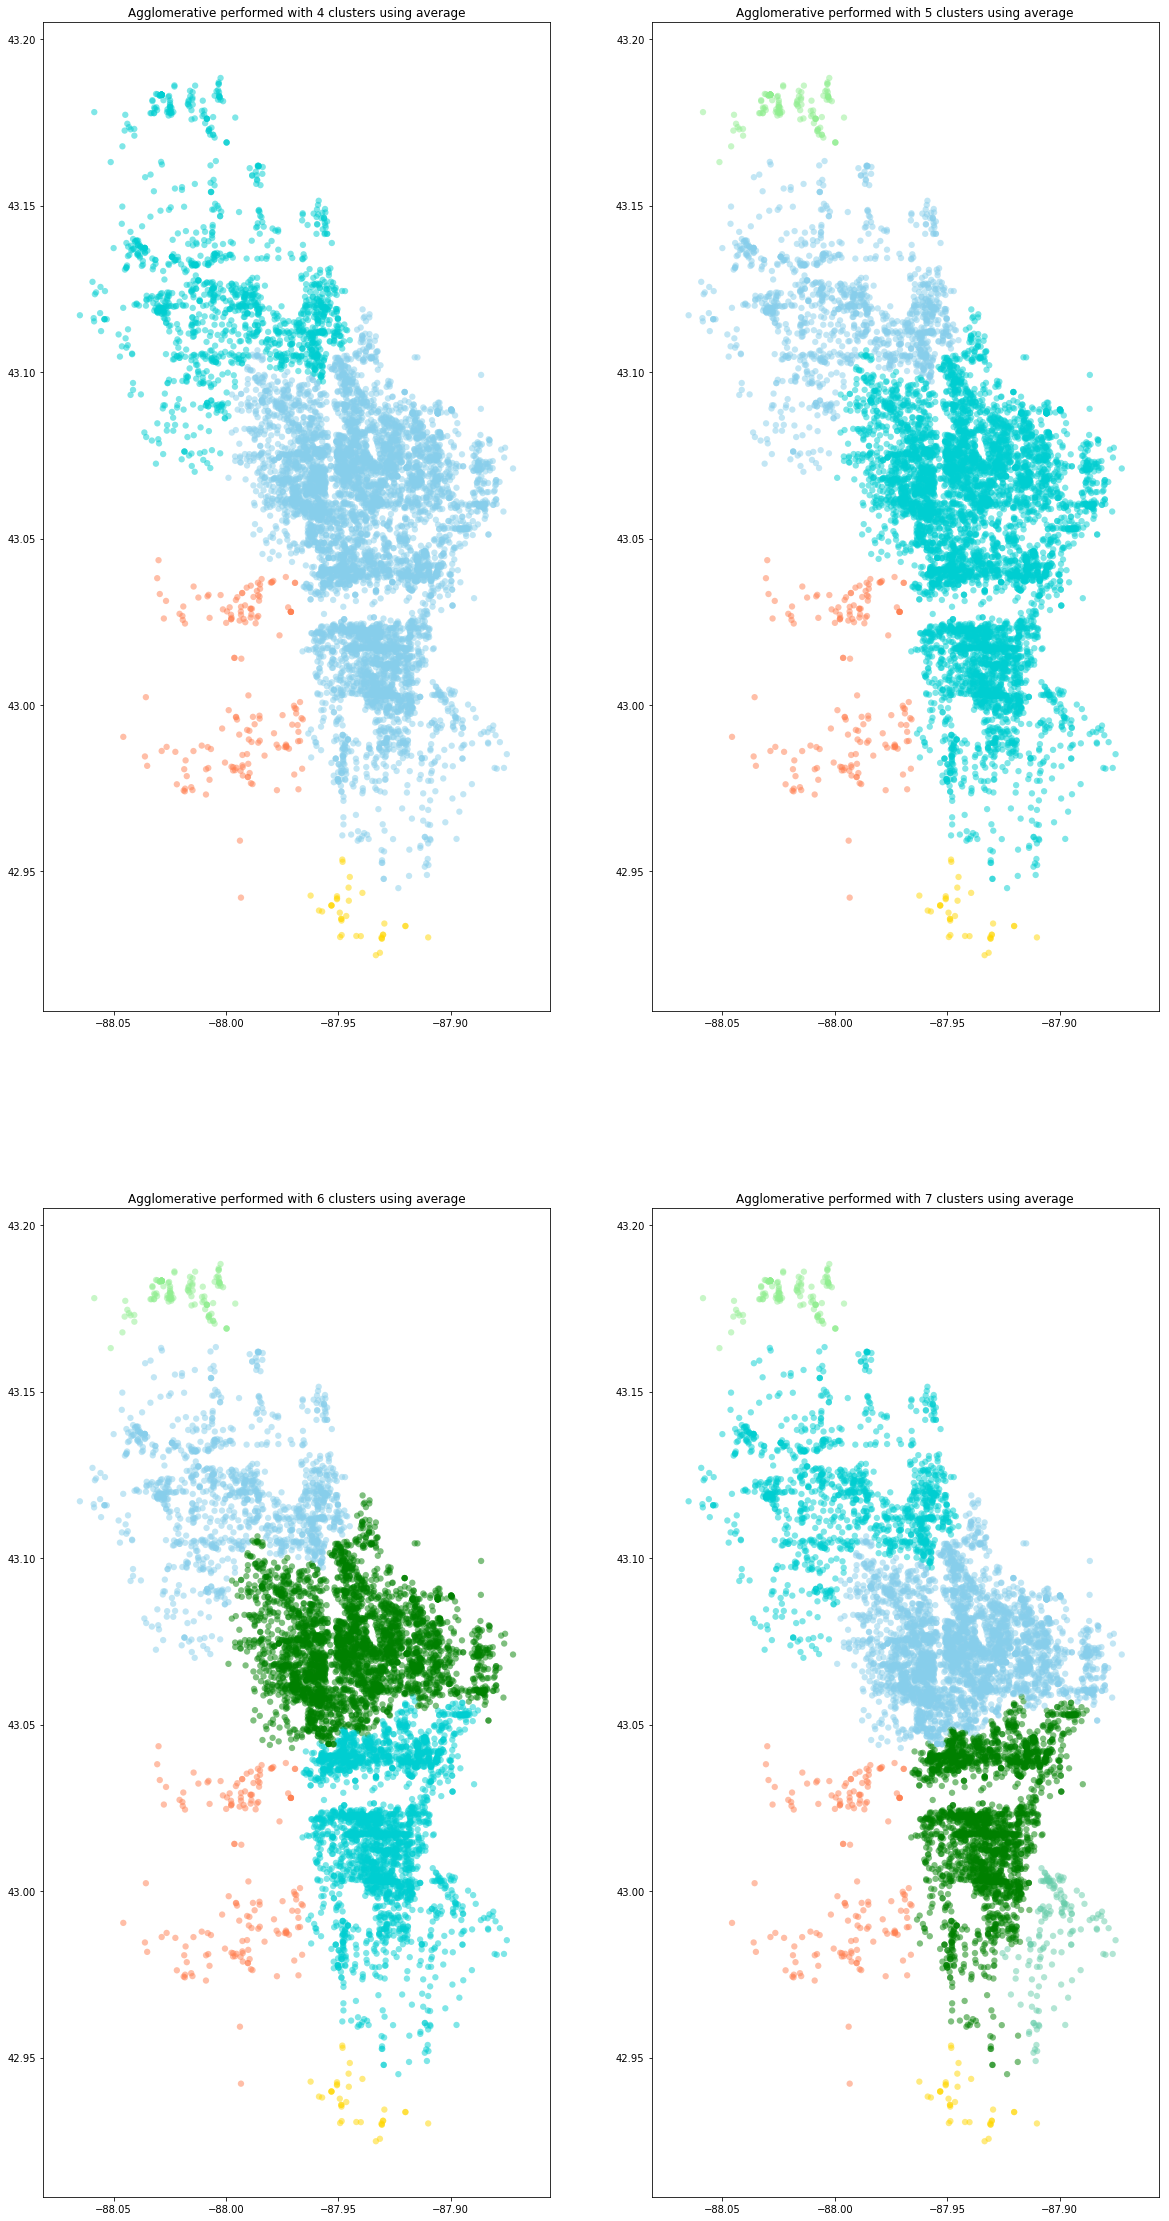

In [42]:
y = 2011
plt.clf()
plt.figure(figsize=(20,40))
datadc_by_year = datadc[datadc['year'] == y]
for x in range(4, 8):
    agg = sklearn.cluster.AgglomerativeClustering(n_clusters = x, linkage = 'average', affinity='manhattan')
    agg.fit(datadc_by_year[['x_lng', 'y_lat']])
    cluster = agg.labels_
    plt.subplot(2, 2, (x-3))
    plt.title('Agglomerative performed with ' + str(x) + ' clusters using ' + prox_schemes[z])
    plt.scatter(datadc_by_year['x_lng'],datadc_by_year['y_lat'], c=colors[cluster], alpha=.5, linewidth=0, s=40)
plt.show()

## Cluster with all years 

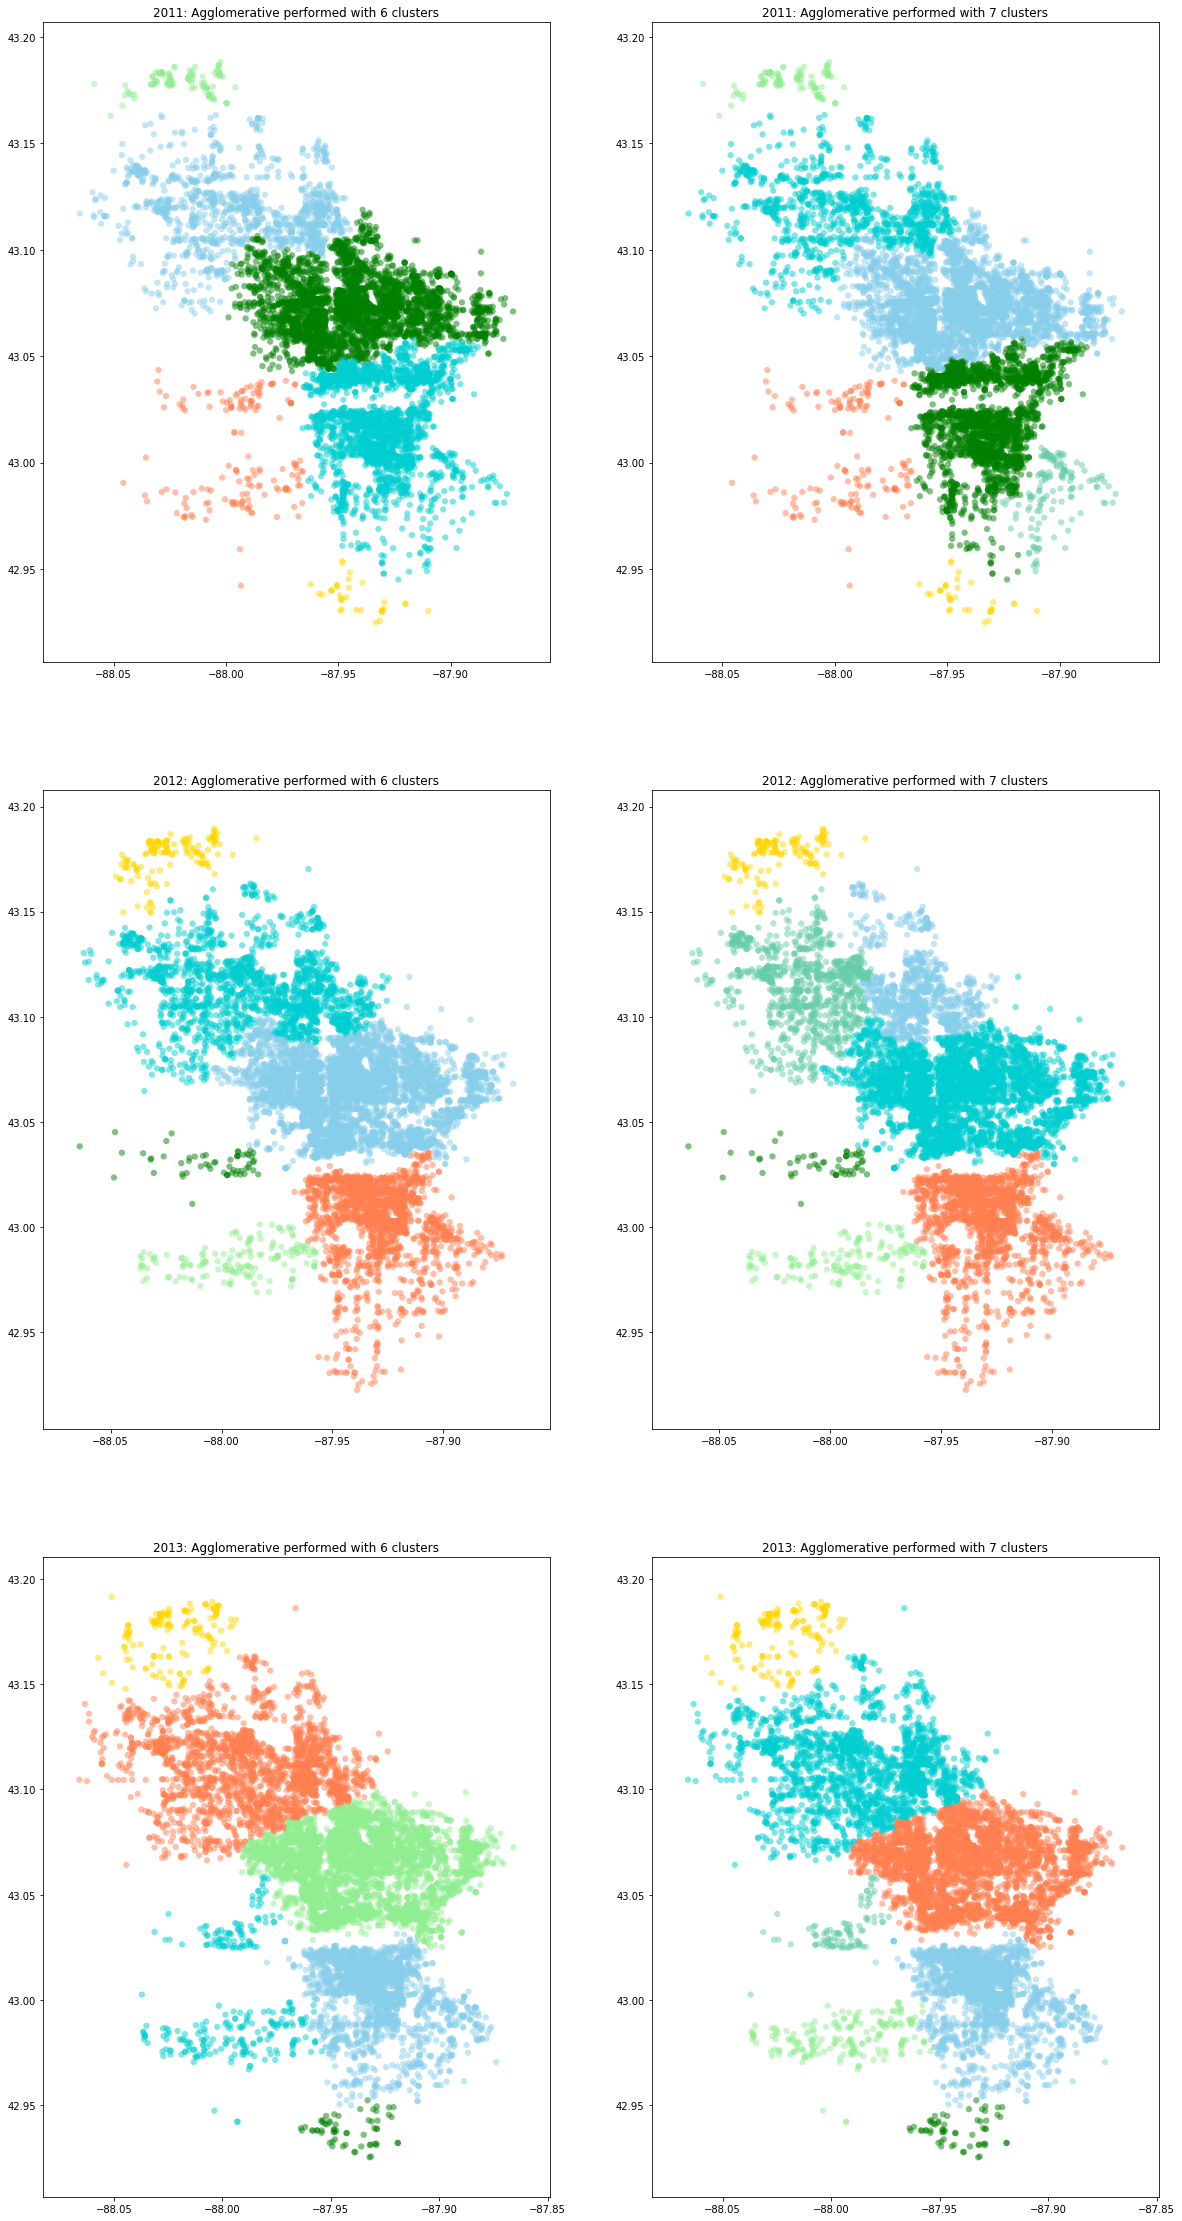

In [53]:
plt.clf()
plt.figure(figsize=(20,40))
for y in range(2011, 2014):
    datadc_by_year = datadc[datadc['year'] == y]
    for x in range(6, 8):
        agg = sklearn.cluster.AgglomerativeClustering(n_clusters = x, linkage = 'average', affinity='manhattan')
        agg.fit(datadc_by_year[['x_lng', 'y_lat']])
        cluster = agg.labels_
        plt.subplot(3, 2, (x-5)+(2*(y-2011)))
        plt.title(str(y) + ': Agglomerative performed with ' + str(x) + ' clusters')
        plt.scatter(datadc_by_year['x_lng'],datadc_by_year['y_lat'], c=colors[cluster], alpha=.5, linewidth=0, s=40)
plt.show()

## Conclusion
I would like to run my cluster analysis algorithm on the results from some of the other clustering methods. I'm not sure that hierarchical clustering is the best avenue for this dataset; for most agglomerative models it didn't find the 'natural' boundaries, such as highway 94.

In [5]:
d = pd.read_csv('2016_mke_muni_court')
d.to_csv('2016.csv')